# 逻辑回归是什么？要有哪些未知参数待求解？如何优化？梯度下降是什么？如何用梯度下降求逻辑回归未知参数？
作者：知乎[@Ai酱](https://www.zhihu.com/people/yuanmuou/activities)
本文要解决的是标题上的那些问题。
## 1. 任何机器学习套路
任何机器学习套路都逃不掉：`使用一个数学模型来套到数据上`->`任何数学模型都有待设定的参数，不同数据适合不同参数值`->`怎么评价这些参数设定值好不好（设计误差函数）`->`用梯度下降或者其他方法求解误差函数最小值点的自变量值（即获得较优参数值）`。**细心的你或许发现了，我用的是"较优"而不是"最优"**。这是因为梯度下降只有在长得像锅的那种函数（学名“凸函数”）才可以找到最优参数值。一般情况找的并不是最优值，其实较优也不错啦。
## 2. 逻辑回归套的数学模型
$f(x) = sigmoid(wx+b)$这就是逻辑回归套的数学模型。**x是输入的样本值，f(x)是x所属分类。在本文中有两个类标签为0,1**。一般模型无法做到x标签是0就输出0，而是输出0.0001，这个很接近0但是不是0。因此我们认为f(x)>0.5它就是属于1，f(x)<0.5就属于0。**$f(x)=sigmoid(wx+b)$它待设定参数是w和b。那么我怎么知道w设置多少是最优的呢**？那就得设计一个误差函数来评估设置的w是不是最优的。一般是用两点间距离公式来作为误差函数。即：$误差函数(w,b)=(样本标签值-sigmoid(wx+b))^2$。注意：$sigmoid(z)=\frac 1 {1+e^{-z}}$，然后sigmoid函数求导的结果是这样的（你不会算也没关系网上查的到的）$sigmoid'(z)=sigmoid(z)(1-sigmoid(z))$
现在误差函数确定了那就得用梯度下降根据误差函数来求解最优的w和b。问题来了梯度下降是什么？
## 3. 梯度下降是什么？
参考这个知乎回答，非常推荐[通俗的讲梯度下降是什么？](https://www.zhihu.com/question/305638940/answer/670034343)。
好了假设你已经看完了那个回答，并且懂了梯度下降大概怎么回事。那就继续讲怎么用梯度下降根据$误差函数(w)=(样本标签值-sigmoid(wx))^2$来求解较优的w。
# 4. 怎么用梯度下降确定逻辑回归里面的套的数学模型中两个待设定的参数w和b的比较好的取值。
它是通过迭代的方式来求w。
1. 给w和b随机赋一个值
2. 循环(很多次){
    - 输入一个样本x;
     注意：$sigmoid(x)=\frac 1 {1+e^{-x}}$，然后sigmoid函数求导的结果是这样的（你不会算也没关系网上查的到的）$sigmoid'(x)=sigmoid(x)(1-sigmoid(x))$，而且**f(x) = sigmoid(wx+b),x是输入的样本值，f(x)是x所属分类**。

    - 计算$\frac {d(误差函数(w))}{dw}=\frac {d((样本标签值-sigmoid(wx+b))^2)}{dw}=-2*(样本标签值-sigmoid(wx+b))*sigmoid'(wx+b)*x=-2*(样本标签值-sigmoid(wx+b))*sigmoid(wx+b)*(1-sigmoid(wx+b))*x=-2*(样本标签值-f(x))*f(x)*(1-f(x))*x$
    - $w = w - 0.01 * \frac {d(误差函数(w))}{dw}$；注意：那个0.01可以你微调的，这个参数叫做学习率。因为梯度下降本质就是不断猜w是多少，如果学习率太大，梯度下降就一下子猜的跨度很大不容易收敛。如果学习率太小一来速度慢而来容易陷入在局部最优解。
    - 计算$\frac {d(误差函数(b))}{db}=\frac {d((样本标签值-sigmoid(wx+b))^2)}{dw}=-2*(样本标签值-sigmoid(wx+b))*sigmoid'(wx+b)=-2*(样本标签值-sigmoid(wx+b))*sigmoid(wx+b)*(1-sigmoid(wx+b))=-2*(样本标签值-f(x))*f(x)*(1-f(x))$
    - $b = b - 0.01 * \frac {d(误差函数(b))}{db}$；

}

然后我们就得到了一个不错的模型。打个比方就是$f(x)=sigmoid(0.231*x)$
# 下面是Python编程实践逻辑回归+梯度下降

将数据绘制如下图所示：


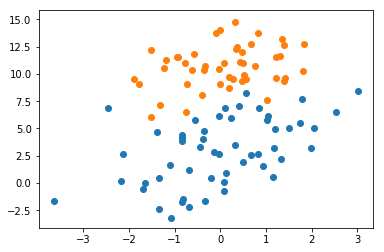

In [2]:
# 绘图案例 an example of matplotlib
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

##########加载数据############
def load_data_set():
    """
    加载数据集
    :return:返回两个数组，普通数组 
        data_arr -- 原始数据的特征
        label_arr -- 原始数据的标签，也就是每条样本对应的类别
    """
    data_arr = []
    label_arr = []
    # 如果想下载参照https://github.com/varyshare/AiLearning/blob/master/data/5.Logistic/TestSet.txt
    # 欢迎follow的我github
    f = open('./dataset/TestSet.txt', 'r')
    for line in f.readlines():
        line_arr = line.strip().split()
        data_arr.append([np.float(line_arr[0]), np.float(line_arr[1])])
        label_arr.append(int(line_arr[2]))
    return np.array(data_arr), np.array(label_arr)
x,label = load_data_set()

print('将数据绘制如下图所示：')
plt.scatter(x[label==1,0],x[label==1,1])
plt.scatter(x[label==0,0],x[label==0,1])

准确率：97.000 %
将wx+b=0这条直线和数据一起绘制如下图所示：


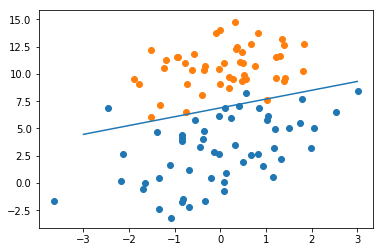

In [3]:
##########套一个数学模型############
# 数学模型就是sigmoid(w*x+b)
# 随机给w和b赋值
w = np.random.rand(x.shape[1])-0.5
b = np.random.rand()-0.5
def sigmoid(x):
    return 1/(1+np.exp(-x))
def f(x):
    '''输入x，return返回sigmoid(w*x)'''  
    return sigmoid(np.matmul(x,w)+b)
    pass

def classifier(x):
    result =f(x)
    result[result>0.5]=1
    result[result<0.5]=0
    return result


##########梯度下降求解较优的w,b值############
learning_rate = 0.01 #学习率
epoch = 500 #用同样的数据反复训练100次
for i in range(epoch):
    for i in range(x.shape[0]):# 一个一个的输入样本训练
        xi     = x[i]
        labeli = label[i]
        w = w - learning_rate *(-(labeli-f(xi))*f(xi)*(1-f(xi))*xi)
        b = b - learning_rate *(-(labeli-f(xi))*f(xi)*(1-f(xi)))
    pass
pass

#########此时我们已经得到比较不错的w和b的取值了####################
classi_result = classifier(x)
print('准确率：%.3f %%'%(np.count_nonzero(np.equal(classi_result,label))/np.float(x.shape[0])*100.0))
print('将wx+b=0这条直线和数据一起绘制如下图所示：')
# 数据散点图
plt.scatter(x[label==1,0],x[label==1,1])
plt.scatter(x[label==0,0],x[label==0,1])
# 绘制我们学习到的直线
x0 = np.linspace(-3.0, 3.0, num=100)
x1 = (-w[0]*x0-b)/w[1]
plt.plot(x0,x1)
